<a href="https://colab.research.google.com/github/mrenchiladas/python-course/blob/main/Redes_neuronales_profundas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales profundas

> **Rodolfo Ferro** <br>
> Google Dev Expert en ML, 2020.
>
> _Redes:_
> - GitHub - [RodolfoFerro](https://github.com/RodolfoFerro)
> - Twitter - [@FerroRodolfo](https://twitter.com/FerroRodolfo)
> - Instagram - [@rodo_ferro](https://instagram.com/rodo_ferro)

## Contenidos

#### **Sección IV**
1. **Código:** El dataset de modas
2. **Código:** Preparación de datos
3. **Código:** Creación del modelo
4. **Código:** Entrenamiento del modelo
5. **Código:** Evaluación del modelo
6. **Código:** Predicción


## **Sección IV**

### El dataset de modas

Comencemos importando TensorFlow.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [ ]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 0
Matrix: [[  0   0   0   0   0   0   0   0   0   0 120  54   0   0   0   0  13 124   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64 173 207 218 206 232 184 168 202 205 218 202 126  12   0   0   1   0   0   0   0]
 [  0   0   0   0   0  56 199 223 222 207 205 211 223 227 231 230 214 203 209 220 213 164   0   0   2   0   0   0]
 [  0   0   0   0   0 191 219 200 200 206 206 205 206 206 203 202 201 202 201 195 198 222 149   0   0   0   0   0]
 [  0   0   0   0  72 224 201 205 208 202 204 204 205 205 208 205 192 188 203 202 200 189 198  23   0   0   0   0]
 [  0   0   0   0 160 221 211 200 204 203 204 203 201 202 201 203 201 185 203 203 188 194 207 126   0   0   0   0]
 [  0   0   0   0 227 212 224 205 201 204 203 202 202 201 201 200 201 195 198 191 182 199 202 202   0   0   0   0]
 [  0   0   0  20 208 205 224 219 201 200 202 202 201 201 199 198 199 199 197 183 195 210 191 189  11   0   0   0]
 [  0   0   0 138 223 201 218 229 216 202 202 200 200 197 197 1

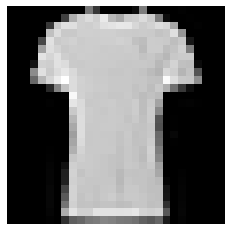

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 5999 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

### Preparación de los datos

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **normalización**.

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 6
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.00392157 0.00392157 0.         0.         0.47058824 0.51372549 0.35686275 0.57647059 0.11764706
  0.         0.         0.00392157 0.00392157 0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.00392157 0.01176471 0.         0.         0.         0.         0.98431373 0.78039216 0.6745098  0.76470588 0.59607843
  0.         0.         0.         0.         0.01176471 0.00392157 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.16862745 0.48627451 0.75686275 0.65098039 0.9372549  1.         0.84705882 0.6745098
  0.89411765 0.49411765 0.23921569 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

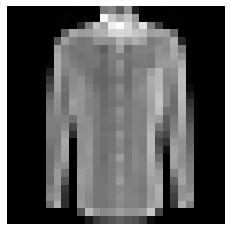

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 3000 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

In [ ]:
training_images[0].shape

(28, 28)

### Creación del modelo



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Entrenamiento del modelo

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4841 - accuracy: 0.8261
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3620 - accuracy: 0.8674
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3276 - accuracy: 0.8789
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3031 - accuracy: 0.8876
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2869 - accuracy: 0.8932
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2718 - accuracy: 0.8989
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2604 - accuracy: 0.9025
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2474 - accuracy: 0.9076
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2387 - accuracy: 0.9092
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.229

### Evaluación del modelo

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3884 - accuracy: 0.8792


[0.3883811831474304, 0.8791999816894531]

### Predicción


Label: 7
Prediction: 7


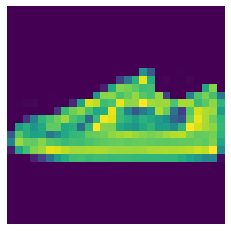

In [ ]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='viridis')
plt.axis(False)

print("Label:", test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = model.predict(np.expand_dims(input_image, axis=-1))
print("Prediction:", np.argmax(prediction))

In [ ]:
prediction

array([[3.2021964e-01, 5.1770403e-06, 6.2667266e-03, 4.3357564e-03, 7.5934454e-06, 1.5508351e-05, 6.6891927e-01, 7.4771127e-11, 2.3000537e-04, 2.8293229e-07]], dtype=float32)